In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load data
data = pd.read_excel('sales_data.xlsx',parse_dates=['Order Date', 'Ship Date'])
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,4,0.0,1.9656
1,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5,0.0,34.4700
2,172,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,...,90004,West,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",20.94,3,0.0,9.8418


In [3]:
#check data for completeness
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1993 non-null   int64         
 1   Order ID       1993 non-null   object        
 2   Order Date     1993 non-null   datetime64[ns]
 3   Ship Date      1993 non-null   datetime64[ns]
 4   Ship Mode      1993 non-null   object        
 5   Customer ID    1993 non-null   object        
 6   Customer Name  1993 non-null   object        
 7   Segment        1993 non-null   object        
 8   Country        1993 non-null   object        
 9   City           1993 non-null   object        
 10  State          1993 non-null   object        
 11  Postal Code    1993 non-null   int64         
 12  Region         1993 non-null   object        
 13  Product ID     1993 non-null   object        
 14  Category       1993 non-null   object        
 15  Sub-Category   1993 n

In [4]:
#drop row id column
data.drop('Row ID', axis=1, inplace = True)
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
#show duplicates
duplicates = data[data.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1741,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
1742,US-2014-150119,2014-04-23,2014-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [6]:
#drop duplicates
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [7]:
#check regional divisions
data['Region'].value_counts() 

Region
West       661
East       516
Central    466
South      349
Name: count, dtype: int64

In [8]:
#Countries in the dataset
data['Country'].unique()

array(['United States'], dtype=object)

In [9]:
#Number of unique cities
data['City'].nunique()

268

In [10]:
#round numerical columns to no decimal places
data[['Sales', 'Profit']] = data[['Sales', 'Profit']].round(0).astype(int)
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7,4,0.0,2
1,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,115,5,0.0,34
2,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",21,3,0.0,10
3,CA-2014-118962,2014-08-05,2014-08-09,Standard Class,CS-12130,Chad Sievert,Consumer,United States,Los Angeles,California,90004,West,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913,111,2,0.0,53
4,CA-2014-146969,2014-09-29,2014-10-03,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Los Angeles,California,90045,West,OFF-FA-10001561,Office Supplies,Fasteners,Stockwell Push Pins,9,4,0.0,3


### Sales Performance

#### Monthly Sales Trend

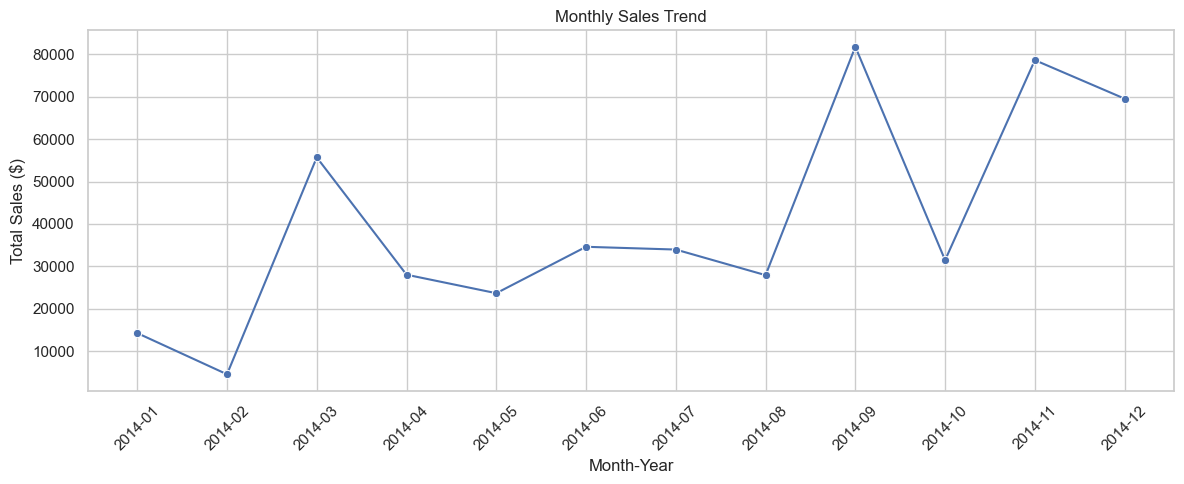

In [11]:
# Extract and create new columns for month, quarter
data['Month'] = data['Order Date'].dt.month
data['Quarter'] = data['Order Date'].dt.to_period('Q')
data['Month Name'] = data['Order Date'].dt.strftime('%b')
data['Month-Year'] = data['Order Date'].dt.to_period('M')


# Monthly Sales
monthly_sales = data.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)


#Create a charts 

sns.set(style="whitegrid")

# Monthly Sales Trend
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month-Year')
plt.tight_layout()
plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight')

plt.show()





In [12]:
# Calculate total sales for the year
total_sales = data['Sales'].sum()

# Filter for peak months
peak_months = ['Mar', 'Sep', 'Nov']
peak_sales = data[data['Month Name'].isin(peak_months)]['Sales'].sum()

# Calculate percentage contribution
peak_percentage = (peak_sales / total_sales) * 100

print(f"Peak months contributed {peak_percentage:.0f}% of total annual sales.")


Peak months contributed 45% of total annual sales.


####  Quarterly Sales Trend

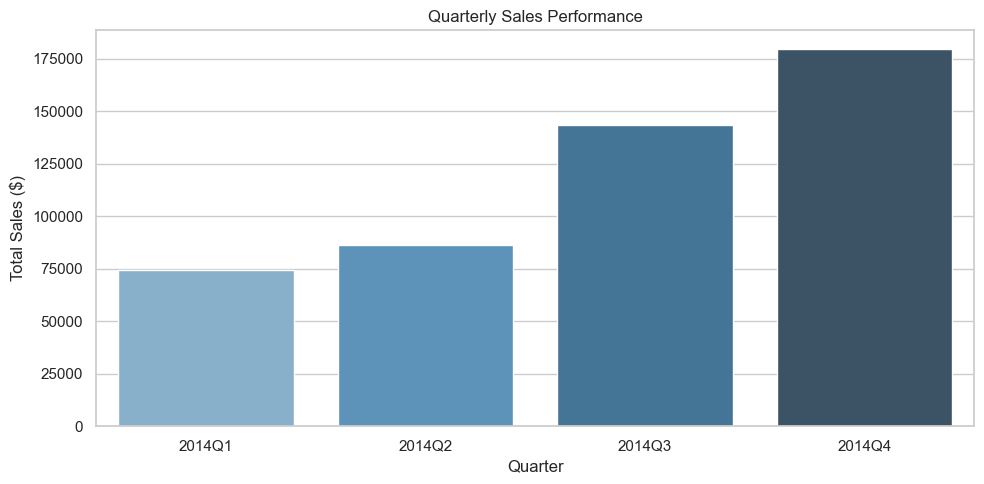

In [13]:
# Quarterly Sales Trend

# Quarterly Sales
quarterly_sales = data.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

plt.figure(figsize=(10, 5))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales',hue='Quarter', palette='Blues_d',legend=False)
plt.title('Quarterly Sales Performance')
plt.ylabel('Total Sales ($)')
plt.xlabel('Quarter')
plt.tight_layout()
plt.savefig('sales_quarter.png', dpi=300, bbox_inches='tight')

plt.show()


#### Discount Tiers vs. Sales and Profitability

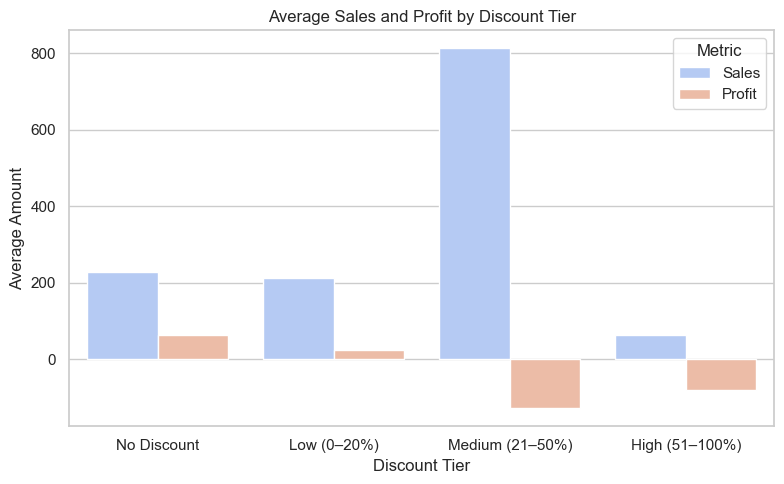

In [14]:
#group cities by customer id,order id
city_density = data.groupby('City').agg({
    'Customer ID': pd.Series.nunique,
    'Order ID': pd.Series.nunique
}).reset_index().rename(columns={
    'Customer ID': 'Unique Customers',
    'Order ID': 'Unique Orders'
})



data['Discount Tier'] = pd.cut(
    data['Discount'],
    bins=[-0.01, 0.0, 0.2, 0.5, 1.0],
    labels=['No Discount', 'Low (0–20%)', 'Medium (21–50%)', 'High (51–100%)']
)

discount_profit = data.groupby('Discount Tier', observed=True)[['Sales', 'Profit']].mean().reset_index()

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(data=discount_profit.melt(id_vars='Discount Tier'), 
            x='Discount Tier', y='value', hue='variable', palette='coolwarm')

plt.title('Average Sales and Profit by Discount Tier')
plt.ylabel('Average Amount')
plt.xlabel('Discount Tier')
plt.legend(title='Metric')
plt.savefig('profitability.png', dpi=300, bbox_inches='tight')

plt.tight_layout()



- Moderate discounts (21–50%) drove the highest average sales, but consistently resulted in negative profit margins.

- Deep discounts (51–100%) generated lower sales volumes and also yielded negative profits, indicating diminishing returns.

- No discount (0%) tiers contributed modest sales, yet delivered the highest profit margins, suggesting healthier unit economics.

### Customer Purchasing Behaviour

#### Revenue Distribution by Product Segment

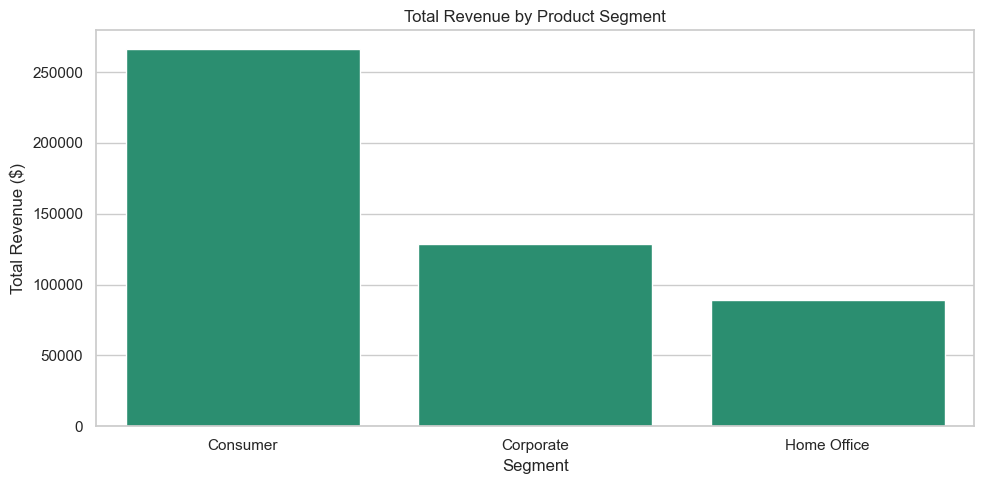

In [15]:
# Total revenue per segment
total_revenue = data.groupby('Segment')['Sales'].sum().reset_index(name='Total Revenue')

# AOV per segment: sum sales per order, then average by segment
order_sales = data.groupby(['Order ID', 'Segment'])['Sales'].sum().reset_index()
aov = order_sales.groupby('Segment')['Sales'].mean().reset_index(name='Average Order Value')

# Merge both metrics
segment_summary = pd.merge(total_revenue, aov, on='Segment')


sns.set(style="whitegrid")
# Bar plot for Total Revenue
plt.figure(figsize=(10, 5))
sns.barplot(data=segment_summary, x='Segment', y='Total Revenue', hue='Segment', palette=['#1b9e77','#1b9e77','#1b9e77'], legend=False)
plt.title('Total Revenue by Product Segment')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Segment')
plt.tight_layout()
sns.set(style="whitegrid")
plt.savefig('sales_by_seg.png', dpi=300, bbox_inches='tight')
plt.show()




- The Consumer segment generated the highest total revenue, significantly outperforming the other segments

In [16]:
# Total sales across all segments
total_sales = data['Sales'].sum()

# Total sales for Consumer segment
consumer_sales = data[data['Segment'] == 'Consumer']['Sales'].sum()

# Calculate percentage
consumer_percentage = (consumer_sales / total_sales) * 100

print(f"Consumer segment contributed {consumer_percentage:.0f}% of total sales.")

Consumer segment contributed 55% of total sales.


#### Average Order Value

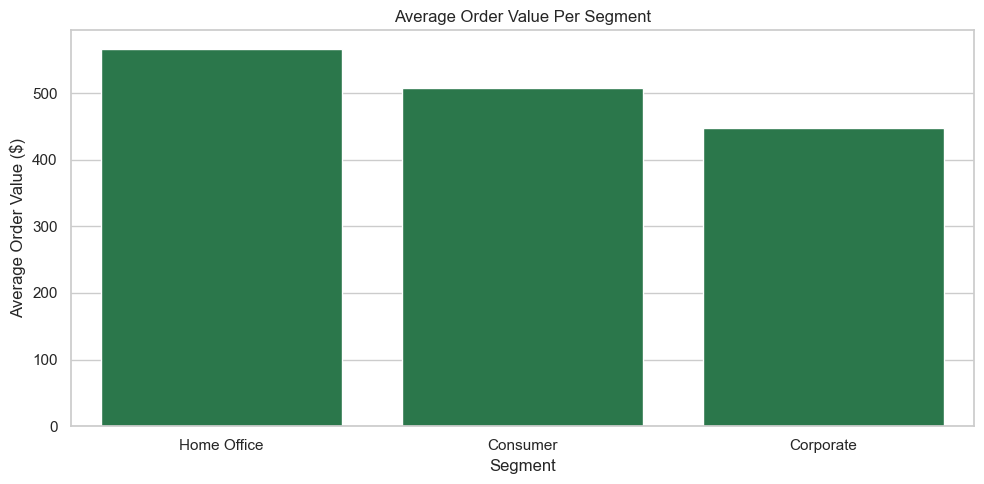

In [17]:

#  Sort the DataFrame by AOV in descending order
segment_summary_sorted = segment_summary.sort_values('Average Order Value', ascending=False)

#  Set the order of segments for plotting
order = segment_summary_sorted['Segment']

# Step 3: Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=segment_summary_sorted,
    x='Segment',
    y='Average Order Value',
    hue='Segment',
    order=order,
    palette=['#1e8449','#1e8449','#1e8449'],
    legend=False
)

plt.title('Average Order Value Per Segment')
plt.ylabel('Average Order Value ($)')
plt.xlabel('Segment')
plt.tight_layout()
plt.savefig('average_order_value.png', dpi=300, bbox_inches='tight')
plt.show()



- Although Consumer segment contributed the highest sales in the year, Home office had the highest AOV

#### Segment-Wise Sales Distribution Across Discount Tiers

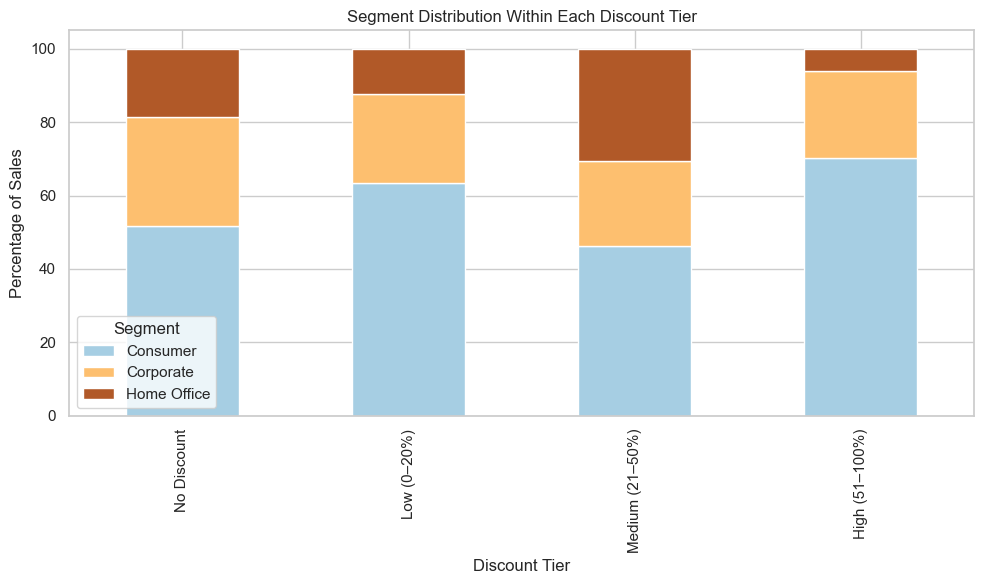

In [18]:
# Group by Discount Tier and Segment
tier_segment = data.groupby(['Discount Tier', 'Segment'],observed=False).agg({
    'Sales': 'sum'
}).reset_index()

# Calculate total sales per discount tier
tier_totals = tier_segment.groupby('Discount Tier',observed=False)['Sales'].transform('sum')

# Calculate percentage of each segment within the tier
tier_segment['Percentage'] = (tier_segment['Sales'] / tier_totals) * 100



# Pivot for plotting
pivot_data = tier_segment.pivot(index='Discount Tier', columns='Segment', values='Percentage')

# Plot
pivot_data.plot(kind='bar', stacked=True, colormap='Paired', figsize=(10, 6))
plt.title('Segment Distribution Within Each Discount Tier')
plt.ylabel('Percentage of Sales')
plt.xlabel('Discount Tier')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()



- Consumer segment is highly discounted and also recorded most sales across all discount tiers

### Product Performance





#### Profit Margin by Segment and Category

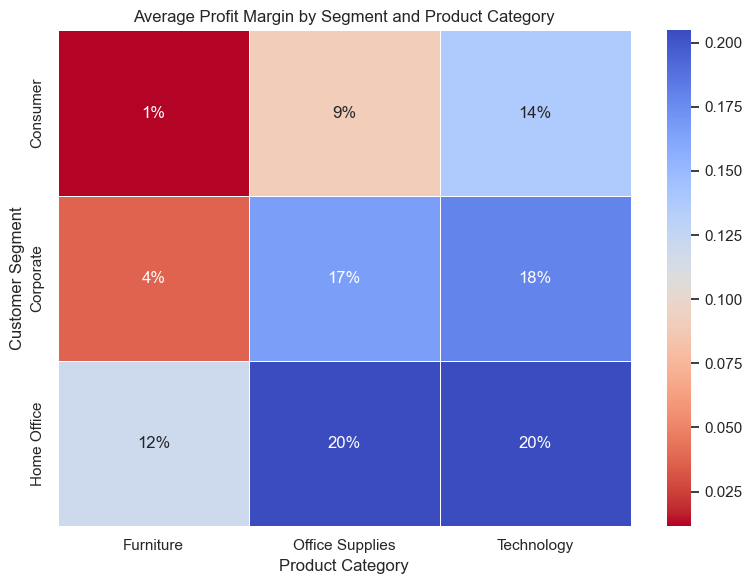

In [19]:
# Calculate profit margin per row
data['Profit Margin'] = data['Profit'] / data['Sales']


# Group by Segment and Product Category, then calculate average profit margin
pivot_data = data.groupby(['Segment', 'Category'])['Profit Margin'].mean().reset_index()

# Pivot for heatmap format
heatmap_data = pivot_data.pivot(index='Segment', columns='Category', values='Profit Margin')



plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True,cmap='coolwarm_r', fmt=".0%", linewidths=0.5)

plt.title('Average Profit Margin by Segment and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Customer Segment')
plt.tight_layout()
plt.savefig('profit_margin', dpi=300, bbox_inches='tight')
plt.show()

- Home Office led in profit margin in all categories indicating strong demand and engagement; ideal for premium offerings or tailored bundles

#### Frequently discounted products by category and it's impact on profitability.

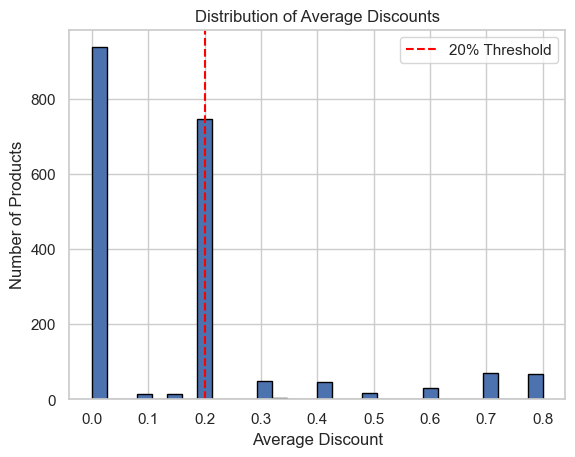

In [20]:
# Plot most discounted threshold
plt.hist(data["Discount"], bins=30, edgecolor='black')
plt.axvline(0.2, color='red', linestyle='--', label='20% Threshold')
plt.title("Distribution of Average Discounts")
plt.xlabel("Average Discount")
plt.ylabel("Number of Products")
plt.legend()
plt.show()


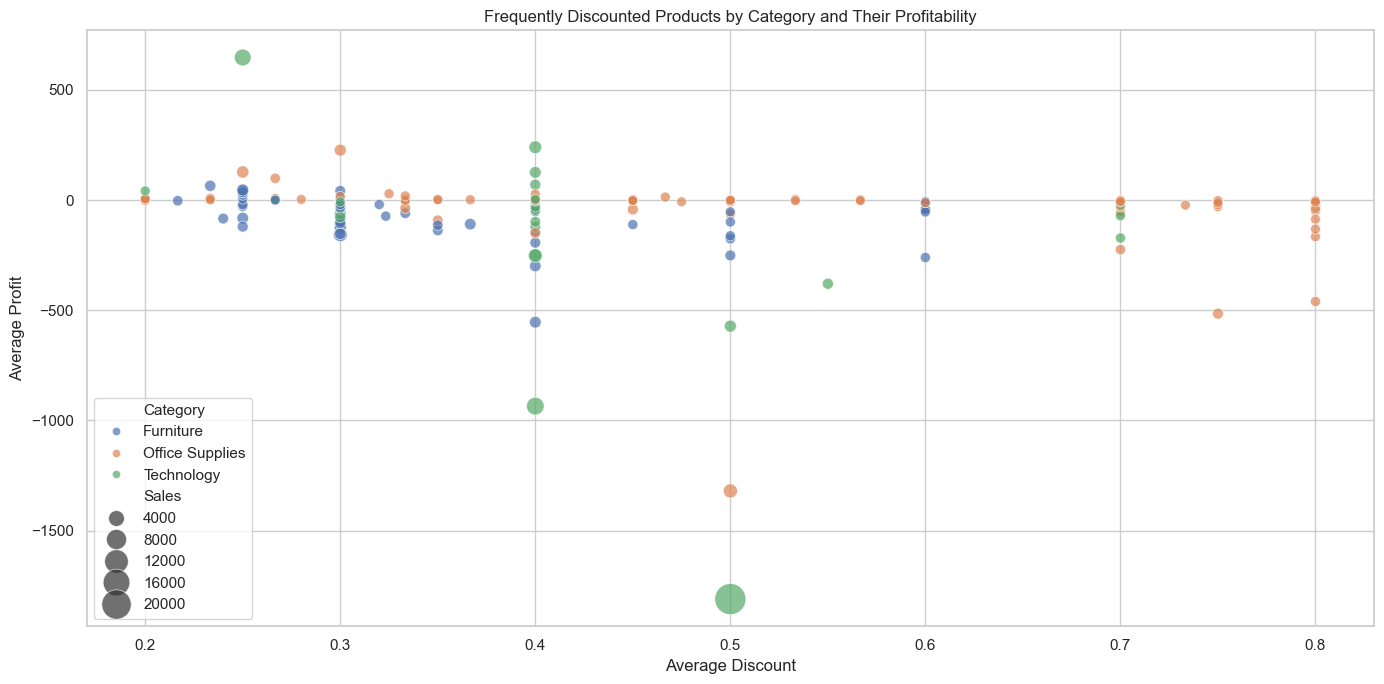

In [21]:
# Group by product and category
product_summary = data.groupby(["Product Name", "Category"]).agg({
    "Discount": "mean",
    "Profit": "mean",
    "Sales": "mean"
}).reset_index()

# Filter products with average discount > 0.2
discounted_products = product_summary[product_summary["Discount"] > 0.2]



plt.figure(figsize=(14,7))

sns.scatterplot(
    data=discounted_products,
    x="Discount",
    y="Profit",
    size="Sales",
    hue="Category",
    sizes=(50, 500),
    alpha=0.7
)


plt.title("Frequently Discounted Products by Category and Their Profitability")
plt.xlabel("Average Discount")
plt.ylabel("Average Profit")
plt.grid(True)
plt.tight_layout()
plt.savefig('frequently_disc.png', dpi=300, bbox_inches='tight')
plt.show()







- Office Supplies are distributed relatively evenly across discount thresholds ranging from 20% to 80%.
- Most Furniture products tend to receive average discounts of 50% or less
.

###  Demographic Analysis


#### Sales, Profit, and Order Volume by City

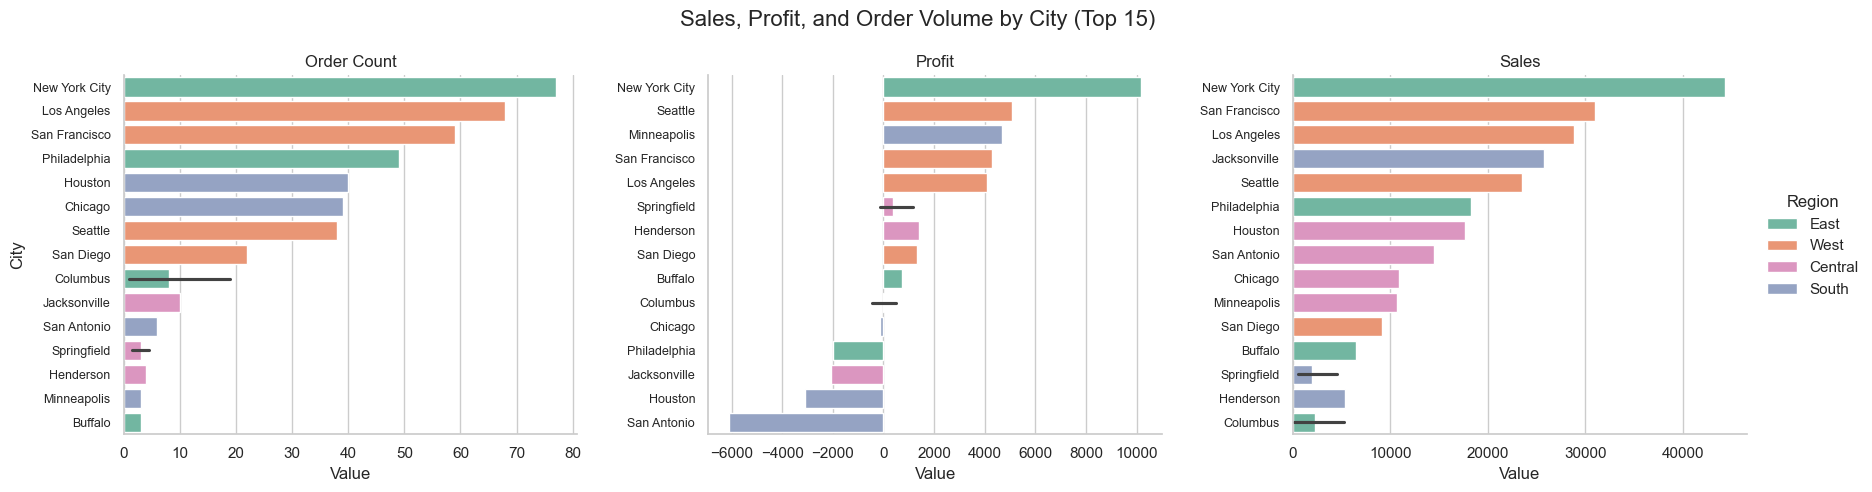

In [22]:
# Group by Region and City to get sales, profit, and order count
region_city_summary = data.groupby(['Region', 'City']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).reset_index().rename(columns={'Order ID': 'Order Count'})


# For each city, assign the region with the highest sales


dominant_region = data.groupby(['City', 'Region'])['Sales'].sum().reset_index()
dominant_region = dominant_region.sort_values(['City', 'Sales'], ascending=[True, False])
dominant_region = dominant_region.drop_duplicates('City').set_index('City')['Region']

# Merge dominant region into the summary
region_city_summary['Dominant Region'] = region_city_summary['City'].map(dominant_region)


# Melt the data
melted = region_city_summary.melt(
    id_vars=['City', 'Dominant Region'],
    value_vars=['Sales', 'Profit', 'Order Count'],
    var_name='Metric',
    value_name='Value'
)

# Filter top cities
top_cities = region_city_summary.sort_values('Sales', ascending=False).head(15)['City']
melted = melted[melted['City'].isin(top_cities)]

melted_sorted = (
    melted.sort_values(['Metric', 'Value'], ascending=[True, False])
)

colorblind_palette = ['#E69F00', '#56B4E9', '#009E73', 
                      '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

g = sns.FacetGrid(
    melted_sorted, col='Metric', sharex=False, sharey=False,
    height=5, aspect=1.2
)

g.map_dataframe(
    sns.barplot, x='Value', y='City', hue='Dominant Region', dodge=False, palette='Set2'
)

g.set_titles('{col_name}')
g.set_axis_labels('Value', 'City')
g.add_legend(title='Region')

for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=9)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Sales, Profit, and Order Volume by City (Top 15)', fontsize=16)
plt.savefig('sales_profit_order.png', dpi=300, bbox_inches='tight')
plt.show()



- Cities in the Southern and Central regions appeared less frequently in the top rankings which shows potential for market development

####  Customer-Dense Cities

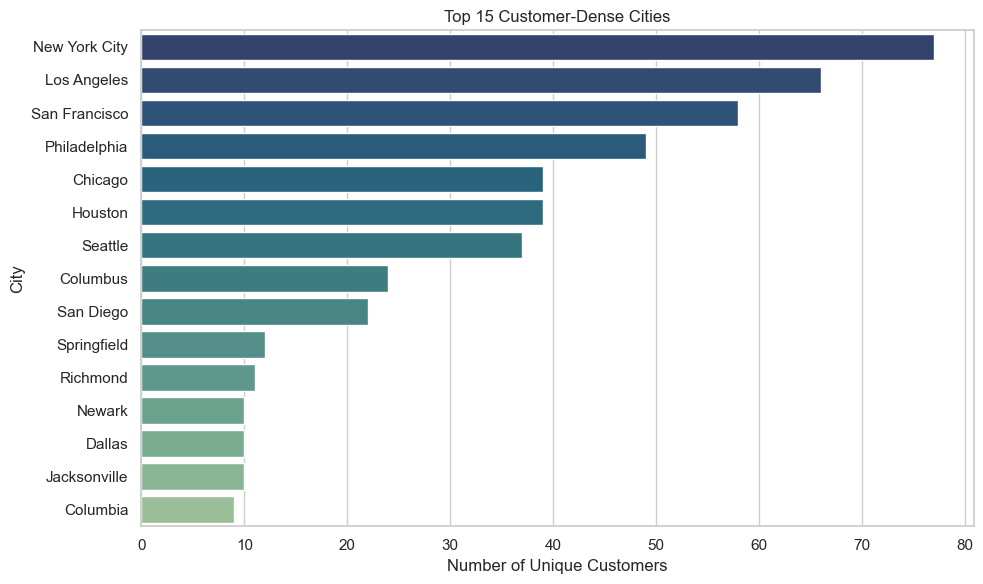

In [23]:
city_density = data.groupby('City').agg({
    'Customer ID': pd.Series.nunique,
    'Order ID': pd.Series.nunique
}).reset_index().rename(columns={
    'Customer ID': 'Unique Customers',
    'Order ID': 'Unique Orders'
})


# Top 15 cities by unique customers
top_cities = city_density.sort_values('Unique Customers', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, y='City', x='Unique Customers', hue='City',palette='crest_r', legend=False)
plt.title('Top 15 Customer-Dense Cities')
plt.xlabel('Number of Unique Customers')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('customer_dense.png', dpi=300, bbox_inches='tight')
plt.show()



- Cities like Springfield and Richmond attracted many customers, but few converted into paying buyers

### Shipping Efficiency

#### Sales Contribution by Ship Mode

In [24]:
# Define consistent Viridis colors for each Ship Mode
ship_mode_colors = {
    'Standard Class': '#440154',  
    'Second Class':   '#31688e',  
    'First Class':    '#35b779',
    'Same Day':       '#fde725'   
}


In [25]:
# Group by Ship Mode and calculate total sales
ship_sales = data.groupby('Ship Mode')['Sales'].sum().reset_index()

# Calculate percentage contribution
total_sales = ship_sales['Sales'].sum()
ship_sales['Sales %'] = (ship_sales['Sales'] / total_sales) * 100

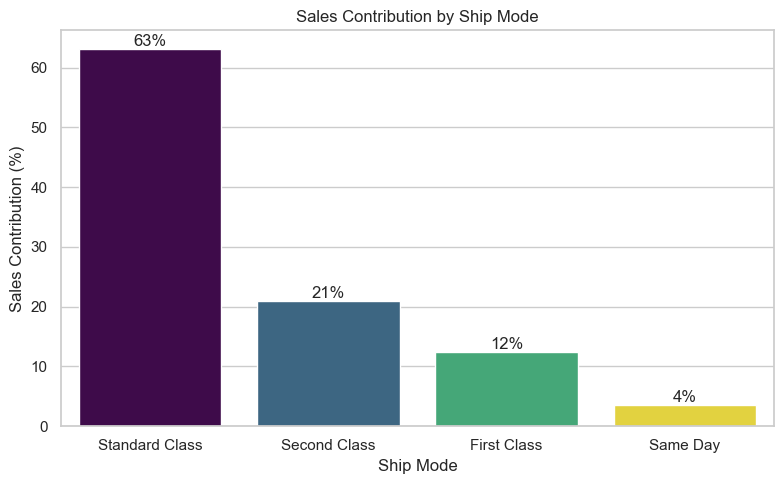

In [26]:
# Sort the DataFrame by percentage
ship_sales = ship_sales.sort_values('Sales %', ascending=False).reset_index(drop=True)

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=ship_sales, x='Ship Mode',hue='Ship Mode',y='Sales %', palette=ship_mode_colors, legend=False)

# Correctly place labels using enumerate
for i, row in enumerate(ship_sales.itertuples()):
    ax.text(i, row._3 + 0.5, f"{row._3:.0f}%", ha='center')  

plt.title('Sales Contribution by Ship Mode')
plt.ylabel('Sales Contribution (%)')
plt.xlabel('Ship Mode')
plt.tight_layout()
plt.savefig('sales_by_shipmode.png', dpi=300, bbox_inches='tight')
plt.show()


- Standard Shipping contributed 63% of sales, which shows heavy reliance on Standard Class

#### Logistics Efficiency: Average Delivery Time by Ship Mode and Segment

In [27]:
#Extarct days between order date and ship date
data["Delivery Time (Days)"] = (data["Ship Date"] - data["Order Date"]).dt.days


# Group by Ship Mode, Category, and Region
delivery_summary = data.groupby(['Ship Mode', 'Category', 'Region'])['Delivery Time (Days)'].mean().reset_index()


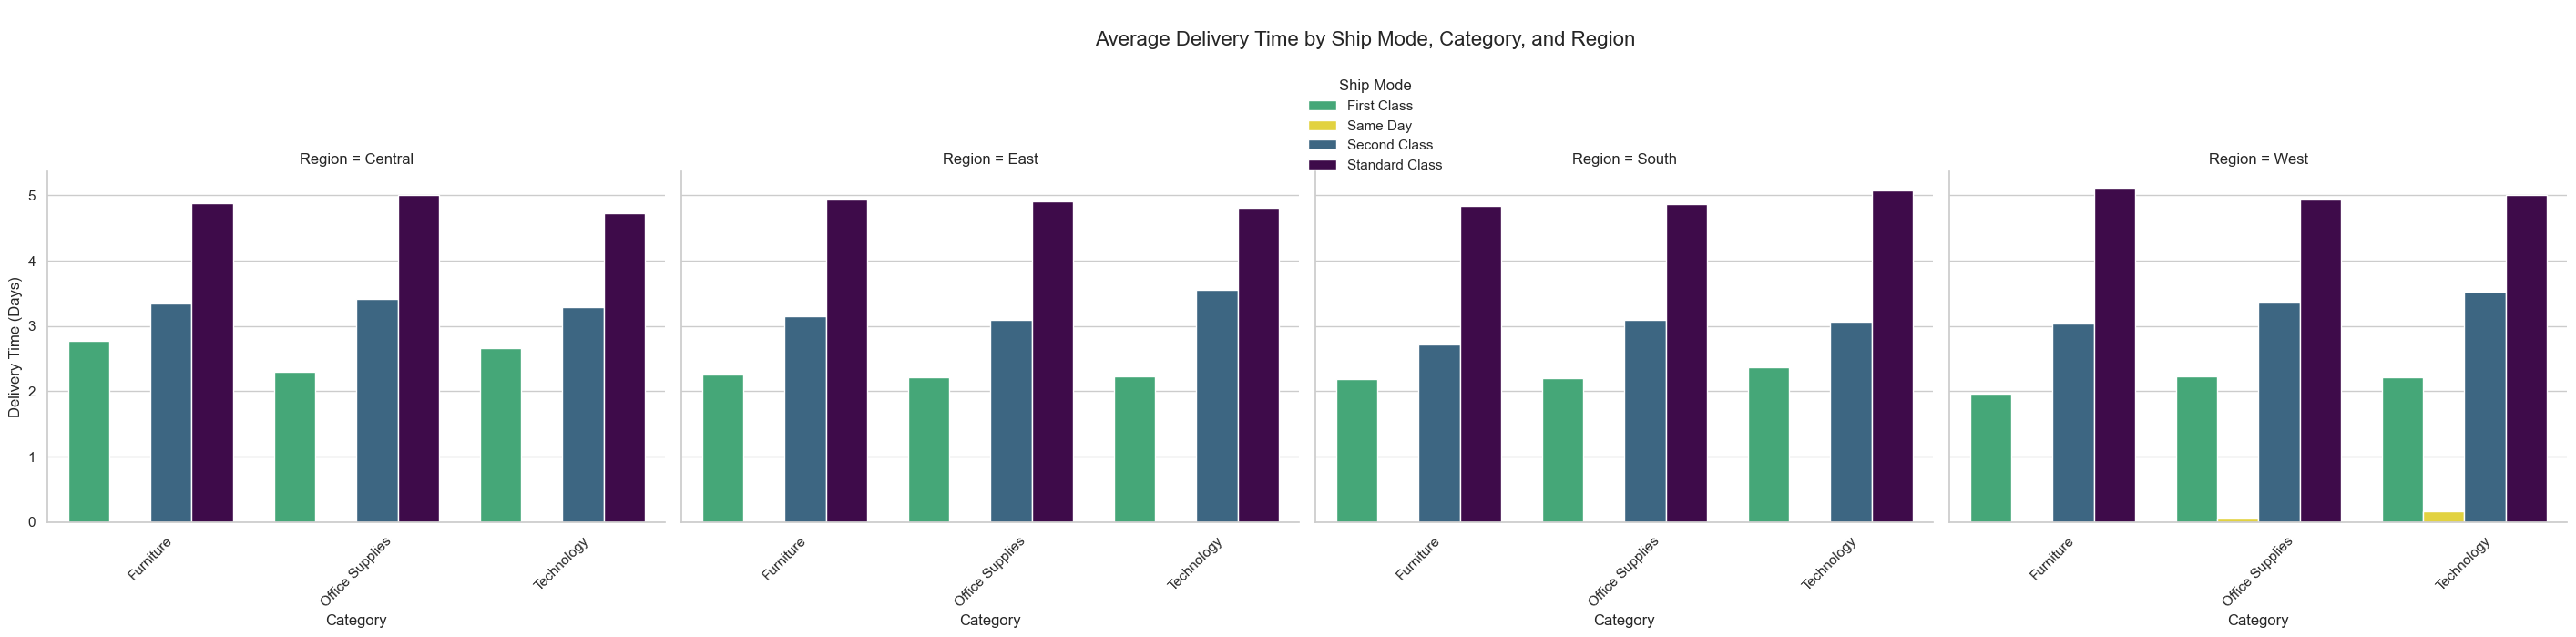

In [28]:
#plot graph
g = sns.catplot(
    data=delivery_summary,
    x='Category', y='Delivery Time (Days)',
    hue='Ship Mode', col='Region',
    kind='bar', height=5.5, aspect=1.3, palette=ship_mode_colors)

# Adjust spacing for title and legend
g.fig.subplots_adjust(top=0.80, bottom=0.1)

# Move legend above plot, below title
g._legend.set_bbox_to_anchor([0.5, 1.02])
g._legend.set_loc('center')
g._legend.set_title('Ship Mode')

# Add title slightly higher
g.fig.suptitle('Average Delivery Time by Ship Mode, Category, and Region', fontsize=16, y=1.08)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=45)
plt.savefig('ADT_SM_CAT_REG', dpi=300, bbox_inches='tight')
plt.show()



- All shipping modes across regions and categories met the standard delivery timeline. Same-day delivery performed as expected with minimal delays, though slight disruptions were noted in the West region for the Technology category